# Gridworld via Dynamic Programming

## Policy Evaluation (Prediction)
Consider the 4x4 gridworld shown below.
- The non-terminal states are $S = \{1,2,...,14\}$.
- There are 4 actions possible in each state, $A = \{up, down, right, left\}$, which deterministically cause the corresponding state transitions, except that actions that would take the agent off the grid in fact the state unchanged.
    -  Thus, for instance, $p(6, 1 | 5, right) = 1, p(7, 1 | 7, right) = 1$, and $p(10, r | 5, right) = 0$, $\forall r \in R$.
- This is an undiscounted, episodic task.
- The reward is -1 on all transitions until the terminal state is reached.
    -  The terminal state is shaded in the figure (although it is shown in 2 places, it is formally 1 state).
- The expected reward function is thus $r(s,a,s') = 1$ for all states $s,s'$ and actions $a$.
- Suppose the agent follows the equiprobable random policy (all actions equally likely).

In [1]:
from IPython.display import Image

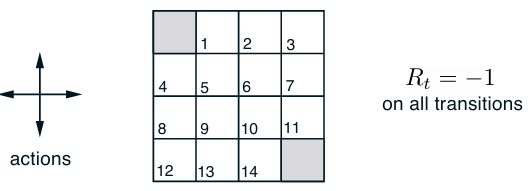

In [2]:
Image(filename="../book_images/Example_4_1.PNG")

- The left side of Figure 4.1 shows the sequence of value functions {$v_k$} computed by iterative policy evaluation.
- The final estimate is in fact $v_{\pi}$, which in this case gives for each state the negation of the expected number of steps from that state until termination.

## Policy Improvement

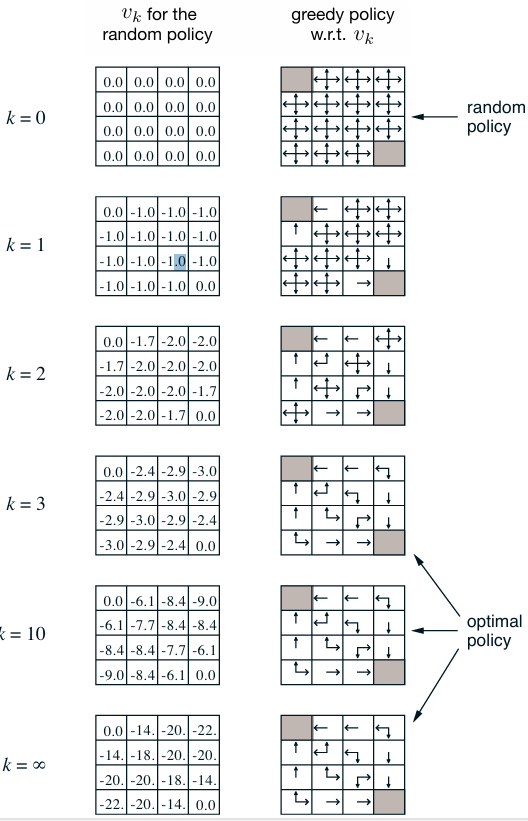

In [3]:
Image(filename="../book_images/Figure_4_1.PNG")

Figure 4.1: Convergence of iterative policy evaluation on a small gridworld.
- The left column is the sequence of approximations of the state-value function for the random policy (all actions equally likely).
- The right column is the sequence of greedy policies corresponding to the value function estimates (arrows are shown for all actions achieving the maximum, and the numbers shown are rounded to 2 significant digits).
- The last policy is guaranteed only to be an improvement over the random policy, but in this case it, and all policies after the 3rd iteration, are optimal.
- The last row shows an example of policy improvement for stochastic policies.
   - Here the original policy, $\pi$, is the equiprobable random policy, and the new policy, $\pi$', is greedy with respect to $v_{\pi}$.
   - The value function $v_{\pi}$ is shown in the bottom-left diagram and the set of possible $\pi$' is shown in the bottom-right diagram.
   - The states with multiple arrows in the $\pi$' diagram are those in which several actions achieve the maximum in Equation (4.9); any apportionment of probability among these actions is permitted.
   - For any such policy, its state values $v_{\pi'}(s)$ can be seen by inspection to be either 1, 2, or 3, $\forall s \in S$, whereas $v_{\pi}(s)$ is at most 14.
   - Thus, $v_{\pi'}(s) \geq v_{\pi}(s)$, $\forall s \in S$, illustrating policy improvement.
   - Although in this case the new policy $\pi$ happens to be optimal, in general only an improvement is guaranteed.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from src.grid_world import compute_state_value, draw

matplotlib.use('Agg')

In [2]:
# In-place computation
in_values, in_place_iterations_number = compute_state_value(in_place=True)
draw(grid=np.round(in_values, decimals=2))
print(f'In-place: {in_place_iterations_number} iterations')

In-place: 113 iterations


In [3]:
plt.savefig('../generated_images/figure_4_1_in_place.png')
plt.close()

In [4]:
# Out-of-place computation
out_values, out_of_place_iterations_number = compute_state_value(in_place=False)
draw(grid=np.round(out_values, decimals=2))
print(f'Out-of-place: {out_of_place_iterations_number} iterations')

Out-of-place: 172 iterations


In [5]:
plt.savefig('../generated_images/figure_4_1_out_place.png')
plt.close()

## Policy Iteration
 - Policy iteration often converges in surprisingly few iterations, as illustrated in the example in Figure 4.1.
 - The bottom-left diagram of Figure 4.1 shows the value function for the equiprobable random policy, and the bottom right diagram shows a greedy policy for this VF.
 - The policy improvement theorem assures us that these policies are better than the original random policy.
 - In this case, however, these policies are not just better, but optimal, proceeding to the terminal states in the minimum number of steps.
 - In this example, policy iteration would find the optimal policy after just 1 iteration.